## Problem statement

Abstract: The data is related with direct marketing campaigns (phone calls) of a insurance institution. The classification goal is to predict if the client will buy a new insurance plan (variable Client_Subscribed).

Data Set Information: The data is related with direct marketing campaigns of a insurance institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (term insurance) would be ('yes') or not ('no') subscribed.


## Content

Attribute Information:
Insurance client data:

Age (numeric)

Job: Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)

Education(categorical: 'Basic', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

Default_Premium: has premium in default? (categorical: 'no', 'yes', 'unknown')

Health_Insurance: has health insurance? (categorical: 'no', 'yes', 'unknown')

General_Insurance: has general insurance? (categorical: 'no', 'yes', 'unknown')

Related with the last contact of the current campaign:

Contact: contact communication type (categorical: 'cellular','telephone')

Month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

Last_Contact_Day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

Last_Contact_Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then Client_Subscribed='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

Contacts_During_Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Previous_Contact_Days: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

Contacts_Before_Campaign: number of contacts performed before this campaign and for this client (numeric)

Previous_outcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Social and economic context attributes

Employment_Rates: employment variation rate - quarterly indicator (numeric)

Price_Variation: consumer price index - monthly indicator (numeric)

Consumer_Confidence_Index: consumer confidence index - monthly indicator (numeric)

Interest_Rate: Interest Rate - annual percentage rate (numeric)

No_Employees: number of employees - quarterly indicator (numeric)

Output variable (desired target):

Client_Subscribed - has the client will buy a new insurance plan? (binary: 'yes', 'no')

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Load Data

In [ ]:
df_bank = pd.read_csv('/content/drive/My Drive/Python_Stats/Decision_Trees_and_Random_Forests/2_In-class Exercise/Dataset/Insurance_Marketing.csv',header=0)
print(df_bank .shape)
print(list(df_bank .columns))

(41188, 21)
['Age', 'Job', 'Marital', 'Qualification', 'Default_Premium', 'Health_Insurance', 'General_Insurance', 'Contact', 'Month', 'Last_Contact_Day', 'Last_Contact_Duration', 'Contacts_During_Campaign', 'Previous_Contact_Days', 'Contacts_Before_Campaign', 'Previous_Outcome', 'Employement_Rates', 'Price_Variation', 'Consumer_Confidence_Index', 'Insurance_Rate', 'No_Employees', 'Client_Subscribed']


In [ ]:
df_bank.head(10)

,Age,Job,Marital,Qualification,Default_Premium,Health_Insurance,General_Insurance,Contact,Month,Last_Contact_Day,Last_Contact_Duration,Contacts_During_Campaign,Previous_Contact_Days,Contacts_Before_Campaign,Previous_Outcome,Employement_Rates,Price_Variation,Consumer_Confidence_Index,Insurance_Rate,No_Employees,Client_Subscribed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,94.159686,-38.173679,3.543298,5074.493963,0
1,57,7,1,1,1,0,0,1,6,1,149,1,999,0,1,1.1,93.374479,-33.312428,6.013585,5125.221264,0
2,37,7,1,1,0,2,0,1,6,1,226,1,999,0,1,1.1,94.100629,-51.947349,2.784063,5205.455324,0
3,40,0,1,0,0,0,0,1,6,1,151,1,999,0,1,1.1,92.772613,-35.624584,4.459237,5096.139930,0
4,56,7,1,1,0,0,2,1,6,1,307,1,999,0,1,1.1,93.241248,-33.492147,3.988744,5112.681264,0
5,45,7,1,0,1,0,0,1,6,1,198,1,999,0,1,1.1,94.760295,-38.577362,6.058114,5153.268354,0
6,59,0,1,3,0,0,0,1,6,1,139,1,999,0,1,1.1,93.625095,-33.671375,3.896024,5250.583878,0
7,41,1,1,5,1,0,0,1,6,1,217,1,999,0,1,1.1,93.649945,-44.549934,6.820409,5064.645471,0
8,24,9,2,3,0,2,0,1,6,1,380,1,999,0,1,1.1,93.849526,-40.052307,3.056284,5166.674781,0
9,25,7,2,1,0,2,0,1,6,1,50,1,999,0,1,1.1,93.456417,-37.959477,3.648408,5193.403261,0


In [ ]:
df_bank.shape

(41188, 21)

In [ ]:
df_bank.info

<bound method DataFrame.info of        Age  Job  Marital  ...  Insurance_Rate  No_Employees  Client_Subscribed
0       56    3        1  ...        3.543298   5074.493963                  0
1       57    7        1  ...        6.013585   5125.221264                  0
2       37    7        1  ...        2.784063   5205.455324                  0
3       40    0        1  ...        4.459237   5096.139930                  0
4       56    7        1  ...        3.988744   5112.681264                  0
...    ...  ...      ...  ...             ...           ...                ...
41183   73    5        1  ...        3.115662   5029.956789                  1
41184   46    1        1  ...        4.819712   5115.011780                  0
41185   56    5        1  ...        2.872091   5159.630226                  0
41186   44    9        1  ...        2.170333   5210.336130                  1
41187   74    5        1  ...        4.582931   5203.077670                  0

[41188 rows x 21 co

In [ ]:
df_bank.dtypes

Age                            int64
Job                            int64
Marital                        int64
Qualification                  int64
Default_Premium                int64
Health_Insurance               int64
General_Insurance              int64
Contact                        int64
Month                          int64
Last_Contact_Day               int64
Last_Contact_Duration          int64
Contacts_During_Campaign       int64
Previous_Contact_Days          int64
Contacts_Before_Campaign       int64
Previous_Outcome               int64
Employement_Rates            float64
Price_Variation              float64
Consumer_Confidence_Index    float64
Insurance_Rate               float64
No_Employees                 float64
Client_Subscribed              int64
dtype: object

## Exploratory data analysis


Let's check, is there any missing value in the dataset?

In [ ]:
df_bank.isnull().sum()

Age                          0
Job                          0
Marital                      0
Qualification                0
Default_Premium              0
Health_Insurance             0
General_Insurance            0
Contact                      0
Month                        0
Last_Contact_Day             0
Last_Contact_Duration        0
Contacts_During_Campaign     0
Previous_Contact_Days        0
Contacts_Before_Campaign     0
Previous_Outcome             0
Employement_Rates            0
Price_Variation              0
Consumer_Confidence_Index    0
Insurance_Rate               0
No_Employees                 0
Client_Subscribed            0
dtype: int64

There is no missing value in the dataset.

## Client  Subscribed

In [ ]:
df_bank['Client_Subscribed'].value_counts()

0    36548
1     4640
Name: Client_Subscribed, dtype: int64

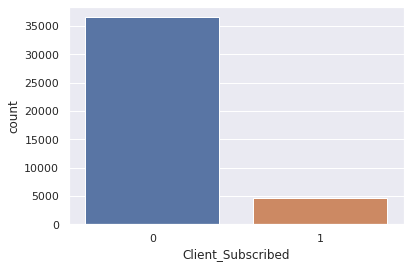

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='Client_Subscribed',data=df_bank)
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.

## Let's compare "Job" and "Client_Subscribed"

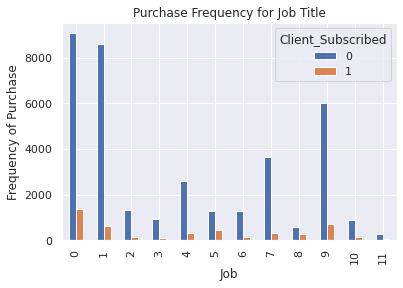

In [ ]:
%matplotlib inline
pd.crosstab(df_bank.Job,df_bank.Client_Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

## Let's compare "Marital" and "Client_Subscribed"

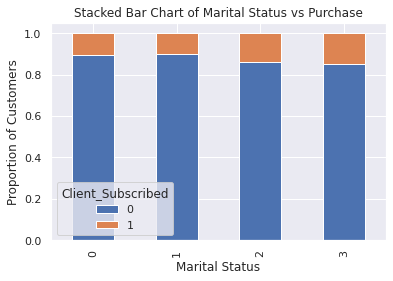

In [ ]:
table=pd.crosstab(df_bank.Marital,df_bank.Client_Subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

## Let's compare "Qualification" and "Client_Subscribed"

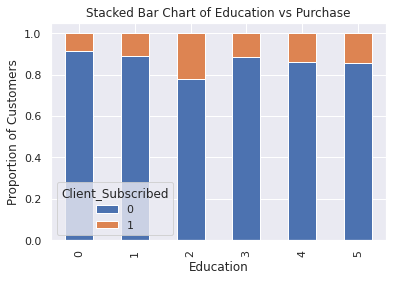

In [ ]:
table=pd.crosstab(df_bank.Qualification,df_bank.Client_Subscribed)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

Education seems a good predictor of the outcome variable.

## Let's compare "Last_Contact_Day" and "Client_Subscribed"

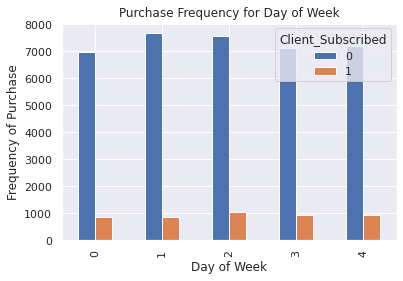

In [ ]:
pd.crosstab(df_bank.Last_Contact_Day,df_bank.Client_Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

Last contact day may not be a good predictor of the outcome

## Let's compare "Month" and "Client_Subscribed"

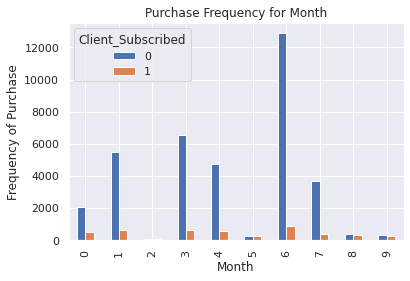

In [ ]:
pd.crosstab(df_bank.Month,df_bank.Client_Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

Month might be a good predictor of the outcome variable

## Let's visualize "Age"

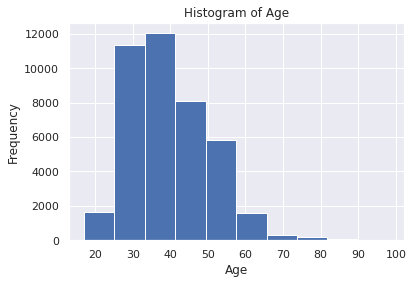

In [ ]:
df_bank.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

The most of the customers of the bank in this dataset are in the age range of 30-40.

## Let's compare "Previous_Outcome" and "Client_Subscribed"

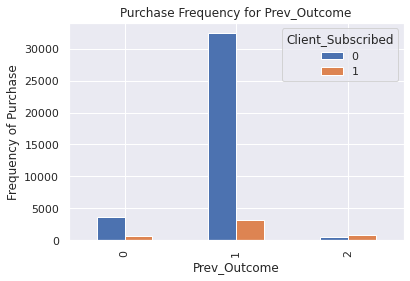

In [ ]:
pd.crosstab(df_bank.Previous_Outcome,df_bank.Client_Subscribed).plot(kind='bar')
plt.title('Purchase Frequency for Prev_Outcome')
plt.xlabel('Prev_Outcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [ ]:
df_bank.corr().style.background_gradient().set_precision(2)

,Age,Job,Marital,Qualification,Default_Premium,Health_Insurance,General_Insurance,Contact,Month,Last_Contact_Day,Last_Contact_Duration,Contacts_During_Campaign,Previous_Contact_Days,Contacts_Before_Campaign,Previous_Outcome,Employement_Rates,Price_Variation,Consumer_Confidence_Index,Insurance_Rate,No_Employees,Client_Subscribed
Age,1.00,0.00,-0.39,-0.06,0.16,-0.00,-0.01,0.01,-0.02,-0.02,-0.00,0.00,-0.03,0.02,0.02,-0.00,0.01,0.00,-0.01,-0.00,0.03
Job,0.00,1.00,0.03,0.12,-0.03,0.01,-0.01,-0.03,-0.03,-0.00,-0.01,-0.01,-0.03,0.02,0.01,-0.01,0.01,0.00,0.01,0.00,0.03
Marital,-0.39,0.03,1.00,0.09,-0.08,0.01,0.01,-0.05,-0.01,0.00,0.01,-0.01,-0.04,0.04,0.00,-0.08,0.01,0.01,0.01,-0.00,0.05
Qualification,-0.06,0.12,0.09,1.00,-0.16,0.02,0.01,-0.10,-0.09,-0.02,-0.01,0.00,-0.05,0.04,0.02,-0.04,-0.00,0.01,-0.00,-0.00,0.06
Default_Premium,0.16,-0.03,-0.08,-0.16,1.00,-0.02,-0.00,0.14,-0.02,-0.01,-0.01,0.03,0.08,-0.10,0.02,0.20,0.00,-0.00,0.00,-0.00,-0.10
Health_Insurance,-0.00,0.01,0.01,0.02,-0.02,1.00,0.04,-0.08,-0.02,0.00,-0.01,-0.01,-0.01,0.02,-0.01,-0.06,-0.00,-0.00,0.01,-0.01,0.01
General_Insurance,-0.01,-0.01,0.01,0.01,-0.00,0.04,1.00,-0.01,-0.01,-0.01,-0.00,0.01,0.00,-0.00,-0.00,0.00,0.01,0.01,0.00,-0.01,-0.00
Contact,0.01,-0.03,-0.05,-0.10,0.14,-0.08,-0.01,1.00,0.28,-0.01,-0.03,0.08,0.12,-0.21,0.12,0.39,0.00,-0.01,0.00,0.00,-0.14
Month,-0.02,-0.03,-0.01,-0.09,-0.02,-0.02,-0.01,0.28,1.00,0.03,0.00,-0.06,-0.05,0.10,-0.07,-0.18,-0.00,-0.00,0.01,0.01,-0.01
Last_Contact_Day,-0.02,-0.00,0.00,-0.02,-0.01,0.00,-0.01,-0.01,0.03,1.00,0.02,-0.04,-0.01,-0.00,0.02,0.03,0.00,0.01,0.01,0.01,0.02


Previous outcome seems to be a good predictor of the outcome variable.

Let's build a model to identify the important variables to predict if the client will buy a new insurance plan.


## Input and output features

In [ ]:
#input and output features
X = df_bank.drop("Client_Subscribed",axis=1).values
y = df_bank.loc[:,"Client_Subscribed"].values

## Implementing the model


## Splitting the dataset into the Training set and Test set


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



## Model Development

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Predicting the test set results and caculating the accuracy

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
print('Accuracy of Decision tree classifier on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of Decision tree classifier on test set: 1.00


In [ ]:
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of Decision tree classifier on train set: 0.89


The training and testing accuracy show the model leads to underfitting.

## Cross Validation

In [ ]:
#Importing libraries for cross-validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#Create a decision tree model
modelCV = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

results = model_selection.cross_val_score(modelCV, X, y, cv=10 , scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

10-fold cross validation average accuracy: 0.744
[0.8895363  0.87302743 0.82689973 0.86647244 0.85384802 0.84073804
 0.65841224 0.39742656 0.81155901 0.42229237]


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10284   681]
 [  708   684]]


True Negative is 10284 that means 10284 observations are correctly predicted as 0.

False Positive is 681 that means 681 observations are wrongly predicted as 1.

False Negative is 708 that means  708observations are wronly predicted as 0.

True Positive is 684 that 684 observations are correctly predicted as 1.

## Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.50      0.49      0.50      1392

    accuracy                           0.89     12357
   macro avg       0.72      0.71      0.72     12357
weighted avg       0.89      0.89      0.89     12357



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

## Let's learn about hyperparameter Tuning


### class_weight  
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

### criterion
The function to measure the quality of a split.

### max_depth  
 Maximum  number of levels in each decision tree

### max_features  
Maximum number of features considered for splitting a node

### max_leaf_nodes
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

### min_impurity_decrease 
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

### min_impurity_split 
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
 
### min_samples_split  
 Minimum number number of data points placed in a node before the node is split

### min_samples_leaf 
Minimum number of data points allowed in a leaf node

### min_weight_fraction_leaf 
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

### presort 
Whether to presort the data to speed up the finding of best splits in fitting. For the default settings of a decision tree on large datasets, setting this to true may slow down the training process. 

### splitter 
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

## Training a model with Random search method

In [ ]:
param_grid = {'min_samples_split': range(10,500,20),
              'max_depth':  range(1,40,2),
              "max_features" : ['auto', 'sqrt'],
              }

In [ ]:
#Ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

#import 
from sklearn.model_selection import RandomizedSearchCV

#Create a decision tree classifier model
randomscv_tree=DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

random_search = RandomizedSearchCV(randomscv_tree,param_distributions=param_grid,n_iter=20,cv=10)
#Fit the grid search object on the training dataset
random_search.fit(X_train,y_train)                      
                        

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
        

## Print best parameter values from random search

In [ ]:
# View the accuracy score
print('Best score for data1:', random_search.best_score_) 

Best score for data1: 0.9042695522992645


In [ ]:
# View the best parameters for the model found using grid search
print('Best min_samples_split:',random_search.best_estimator_.min_samples_split) 
print('Best max_depth:',random_search.best_estimator_.max_depth) 
print('Best max_depth:',random_search.best_estimator_.max_features) 

Best min_samples_split: 390
Best max_depth: 23
Best max_depth: auto


## Prediction on test data by a model using random search parameter

In [ ]:
# Predicting the Test set results
y_pred = random_search.predict(X_test)

In [ ]:
print('Accuracy of Decision tree classifier on train set: {:.2f}'.format(random_search .score(X_train, y_train)))

Accuracy of Decision tree classifier on train set: 0.91


In [ ]:
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(random_search .score(X_test, y_test)))

Accuracy of Decision tree classifier on test set: 0.90


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10549   416]
 [  776   616]]


True Negative is 10694 that means 10694 observations are correctly predicted as 0.

False Positive is 271 that means 271 observations are wrongly predicted as 1.

False Negative is 871 that means  871 observations are wronly predicted as 0.

True Positive is 520 that 520 observations are correctly predicted as 1.

## Training a model with grid search method

In [ ]:
param_grid = {'min_samples_split': range(10,500,20),
              'max_depth':  range(1,30,2),
              "max_features" : ['auto', 'sqrt'],
              "max_leaf_nodes" : range(2,6)
              }

In [ ]:
#Ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Import gridsearchcv module
from sklearn.model_selection import GridSearchCV

#Create a decision tree classifier model
clf_tree=DecisionTreeClassifier(criterion='entropy',random_state = 0)

#Create a grid search object
grid_search = GridSearchCV(clf_tree,param_grid,cv=10)

#Fit the grid search object on the training dataset
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 30, 2),
                         'max_features': ['auto', 'sqrt'],
         

## Print best parameter values 

In [ ]:
# View the accuracy score
print('Best score for data1:', grid_search.best_score_) 

Best score for data1: 0.8873434856298076


In [ ]:
# View the best parameters for the model found using grid search
print('Best min_samples_split:',grid_search.best_estimator_.min_samples_split) 
print('Best max_depth:',grid_search.best_estimator_.max_depth)
print('Best max_leaf_nodes:',grid_search.best_estimator_.max_leaf_nodes)



Best min_samples_split: 10
Best max_depth: 1
Best max_leaf_nodes: 2


## Build a model using best parameters

In [ ]:
#Create a decision tree classifier model
model_gc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,min_samples_split=10,max_depth=1,max_leaf_nodes=2)

#Fit the model on training dataset
model_gc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Accuracy

In [ ]:
# Predicting the Test set results
y_pred = model_gc.predict(X_test)

In [ ]:
print('Accuracy of Decision tree classifier on train set: {:.2f}'.format(model_gc.score(X_train, y_train)))

Accuracy of Decision tree classifier on train set: 0.89


In [ ]:
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(model_gc.score(X_test, y_test)))

Accuracy of Decision tree classifier on test set: 0.89


## Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10965     0]
 [ 1392     0]]


True Negative is 10565 that means 10565 observations are correctly predicted as 0.

False Positive is 400 that means 400 observations are wrongly predicted as 1.

False Negative is 672 that means  672 observations are wronly predicted as 0.

True Positive is 720 that 720 observations are correctly predicted as 1.

## Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10965
           1       0.00      0.00      0.00      1392

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.79      0.89      0.83     12357



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

## Conclusion

A tree which is build using the best parameter from Random search method has not given good accuracy. 

A tree which is build using the best parameter from Grid search method has not given good accuracy. 

A tree which is build using the default parameter has given better result than the other two models.

## Visualize best one of the above tree

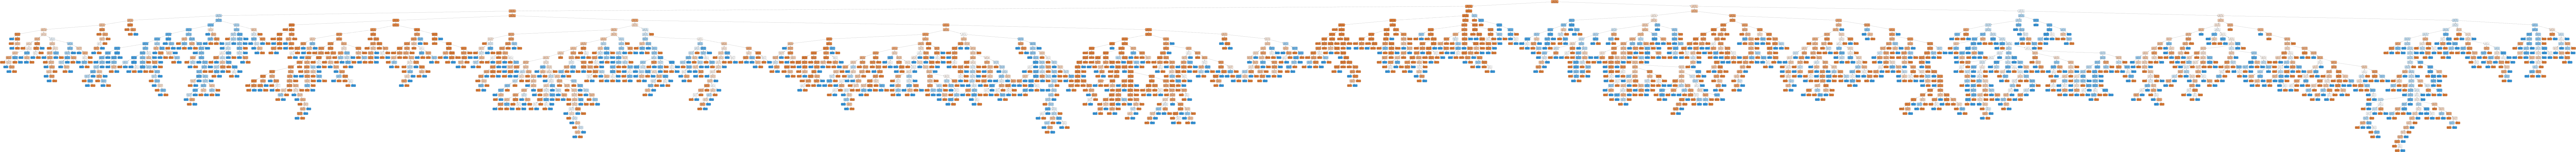

In [ ]:
#importing library to visualize tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Create string input and output object
dot_data = StringIO()

#Export resulting tree to DOT source code string
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
#Create graph from dot value
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

#Set up graph size
graph.set_size('"100,100!"')

#Create png from graph
Image(graph.create_png())

X represents variable. For example, X (subscript 10) =< 209.0 means 10th variable which value below or equal to 209.0 is split into a node.

The entropy represents impurity of the node. 

The samples represent how many observations are in the node. 

The value represents how many samples belong to 0 and how many samples belong to 1.



## View Feature Importance




In [ ]:
importances_features =classifier.feature_importances_


## Visualize Feature Importance


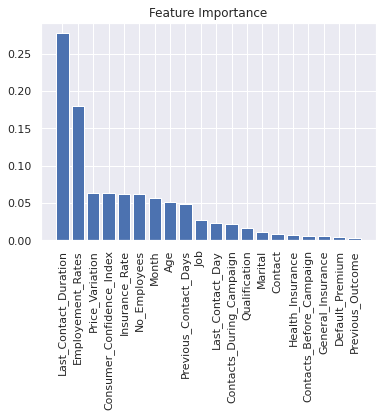

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importances_features)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_bank.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances_features[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

The above plot show feature importance to predict if the client will buy a new insurance plan (variable Client_Subscribed).

Decision classifier has an accuracy of 89% when predicting the client will buy a new insurance plan.